# Telco Customer Churn dataset
# (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

The goal of the dataset is to predict whether a customer will churn (leave the service) or stay with the telecommunication company. This is a binary classification problem   where the target variable is "Churn", indicating:  

Yes (1): The customer has churned  
No (0): The customer has not churned  

The task involves analyzing various customer attributes such as demographics, service subscriptions, and usage patterns to build a predictive model that can help the company identify potential   churners and take preventive actions

## Data cleaning and Feature Engineering

In [66]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# This option is to display all columns
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
import numpy as np

# This code iterates through the DataFrame, checks for cells containing only whitespace or empty strings, and replaces them with NaN to mark them as missing values
df = df.apply(lambda col: col.apply(lambda v: np.nan if isinstance(v, str) and v.strip() == '' else v))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
# Missing values by percentage
df.isnull().mean()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [69]:
# it converts all non-nan values in the TotalCharges column to floats
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x) if pd.notna(x) else x)

This way we can see that only the df['TotalCharges'] column has some empty columns. Let's see the distribution of the data

<Axes: >

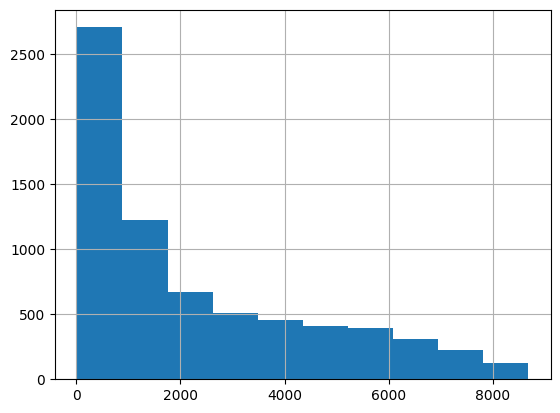

In [70]:
df['TotalCharges'].hist(bins=10)

This column has nothing to do with Gauss distribution, so let's see the outliers

Number of outliers: 0


<Axes: >

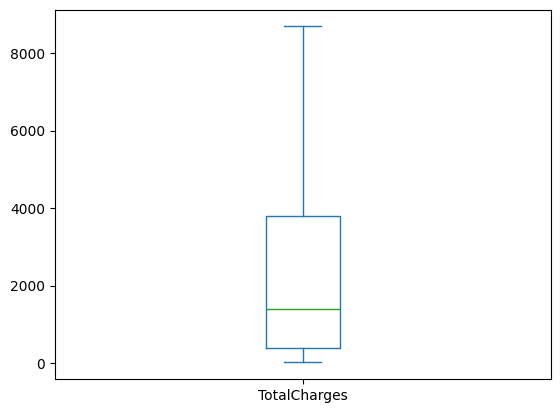

In [71]:
q1 = df['TotalCharges'].quantile(0.25)
q3 = df['TotalCharges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

df['TotalCharges'].plot.box()

The absence of a Gaussian distribution, the lack of outliers, and the fact that only a very small percentage of the data is missing led me to decide on replacing the missing values with a simple mean

In [72]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [73]:
df['TotalCharges'].isna().sum()

0

We have eliminated the NaN values

I separated the customerID column into customerID_number and customerID_text columns because I believe that the number and the text components, when encoded individually, might hold valuable information for the model, potentially revealing hidden patterns or insights

In [74]:
df[['customerID_number', 'customerID_text']] = df['customerID'].str.split('-', expand=True)

max_length = df['customerID_text'].str.len().max()

customer_id_text_column_names = []
for i in range(max_length):
    df[f'customerID_text_char_{i+1}'] = df['customerID_text'].apply(lambda x: x[i] if i < len(x) else 'missing')
    customer_id_text_column_names.append(f'customerID_text_char_{i+1}')
    
df = df.drop(['customerID', 'customerID_text'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID_number,customerID_text_char_1,customerID_text_char_2,customerID_text_char_3,customerID_text_char_4,customerID_text_char_5
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590,V,H,V,E,G
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575,G,N,V,D,E
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668,Q,P,Y,B,K
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795,C,F,O,C,W
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237,H,Q,I,T,U


I analyze the columns to determine the most suitable encoding methods for each, examine how many unique values they contain, and identify which columns can be encoded directly without further consideration

In [75]:
for column in df.columns:
    unique_count = df[column].nunique()
    dtype = df[column].dtype
    print(f"{column} - {unique_count} - {dtype}")

gender - 2 - object
SeniorCitizen - 2 - int64
Partner - 2 - object
Dependents - 2 - object
tenure - 73 - int64
PhoneService - 2 - object
MultipleLines - 3 - object
InternetService - 3 - object
OnlineSecurity - 3 - object
OnlineBackup - 3 - object
DeviceProtection - 3 - object
TechSupport - 3 - object
StreamingTV - 3 - object
StreamingMovies - 3 - object
Contract - 3 - object
PaperlessBilling - 2 - object
PaymentMethod - 4 - object
MonthlyCharges - 1585 - float64
TotalCharges - 6531 - float64
Churn - 2 - object
customerID_number - 5084 - object
customerID_text_char_1 - 26 - object
customerID_text_char_2 - 26 - object
customerID_text_char_3 - 26 - object
customerID_text_char_4 - 26 - object
customerID_text_char_5 - 26 - object


The transformation of columns containing only Yes/No and Female/Male values

In [76]:
yes_no_columns = []

for column in df.columns:
    unique_values = set(df[column].unique())
    if unique_values == {'Yes', 'No'} or unique_values == {'No', 'Yes'} or unique_values == {'Female', 'Male'} or unique_values == {'Male', 'Female'}:
        yes_no_columns.append(column)

print("Columns with only Yes and No:", yes_no_columns)

Columns with only Yes and No: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [77]:
yes_no_dict = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}

for column in yes_no_columns:
    df[f'{column}_encoded'] = df[column].map(yes_no_dict)

df = df.drop(yes_no_columns, axis=1)

In [78]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,customerID_number,customerID_text_char_1,customerID_text_char_2,customerID_text_char_3,customerID_text_char_4,customerID_text_char_5,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,7590,V,H,V,E,G,0,1,0,0,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.50,5575,G,N,V,D,E,1,0,0,1,0,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,3668,Q,P,Y,B,K,1,0,0,1,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,7795,C,F,O,C,W,1,0,0,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,9237,H,Q,I,T,U,0,0,0,1,1,1


Before training the model, I will use Random Oversampling to balance the dataset by duplicating samples from the minority class.

I chose Random Oversampling instead of SMOTE because it keeps the target column strictly binary (0 and 1). SMOTE generates synthetic samples through interpolation, which isn’t needed here and could make the data less realistic. Random Oversampling is simple and ensures the minority class is well-represented

<Axes: title={'center': 'Balance of the target column'}, xlabel='Churn_encoded'>

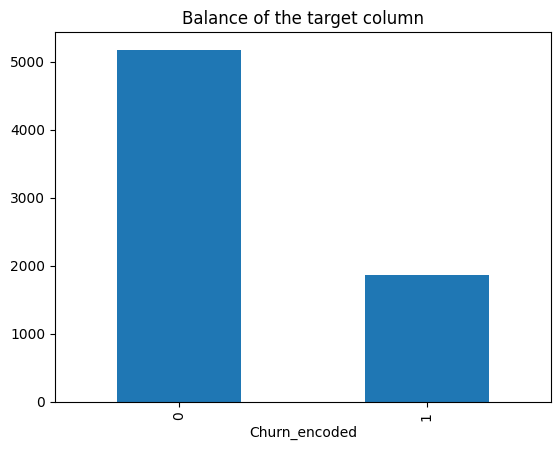

In [79]:
df['Churn_encoded'].value_counts().plot(kind='bar', title='Balance of the target column')

Now we can inspect the other columns

In [80]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    if unique_count < 10 and not set(unique_values).issubset({0, 1}):
        print(f"{column} - {unique_values}")

MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


From the perspective of churn prediction, the values in the 'Contract' column could be encoded using ordinal encoding, as the longer a customer has a contract with the company, the less likely they are to leave

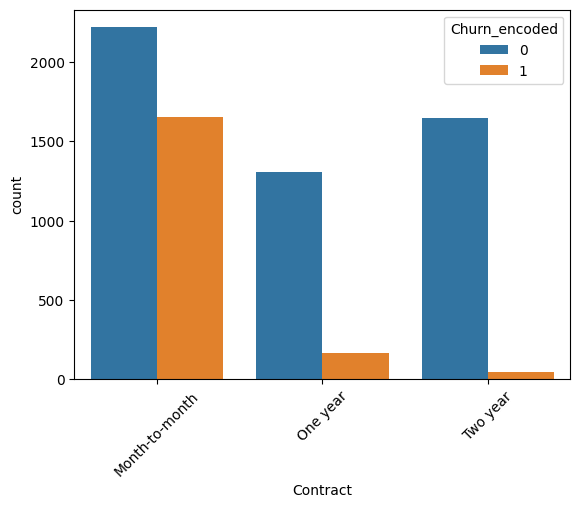

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_sns_countplot(column_name):
    plt.figure()
    sns.countplot(x=df[f'{column_name}'], hue=df['Churn_encoded'])
    plt.xticks(rotation=45)

create_sns_countplot('Contract')

The plot shows that the longer the contract duration, the fewer customers have churned, confirming our assumption. Therefore, we can apply ordinal encoding to the values in the 'Contract' column.

In [82]:
contract_mapping = {
    'Month-to-month':1,
    'One year':2,
    'Two year':3
}

for column in contract_mapping:
    df['Contract_encoded'] = df['Contract'].map(contract_mapping)

df = df.drop('Contract', axis=1)

In [83]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,customerID_number,customerID_text_char_1,customerID_text_char_2,customerID_text_char_3,customerID_text_char_4,customerID_text_char_5,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,Contract_encoded
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Electronic check,29.85,29.85,7590,V,H,V,E,G,0,1,0,0,1,0,1
1,0,34,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,1889.50,5575,G,N,V,D,E,1,0,0,1,0,0,2
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,108.15,3668,Q,P,Y,B,K,1,0,0,1,1,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,1840.75,7795,C,F,O,C,W,1,0,0,0,0,0,2
4,0,2,No,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,151.65,9237,H,Q,I,T,U,0,0,0,1,1,1,1


It might also be worth examining the other columns from this perspective to see if similar trends are visible in the charts

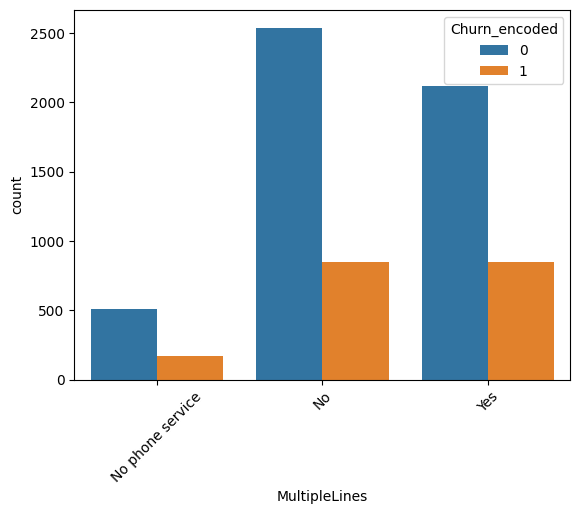

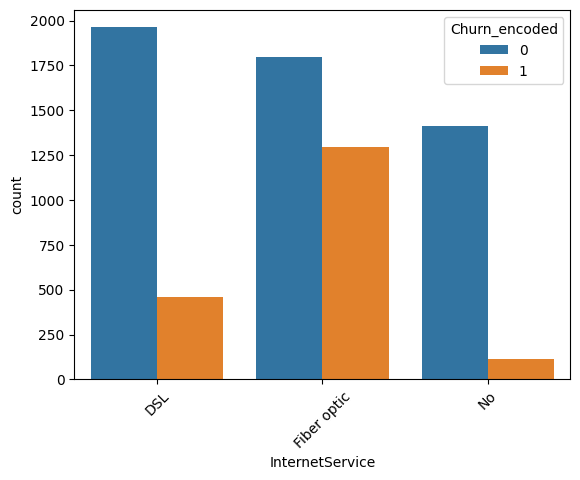

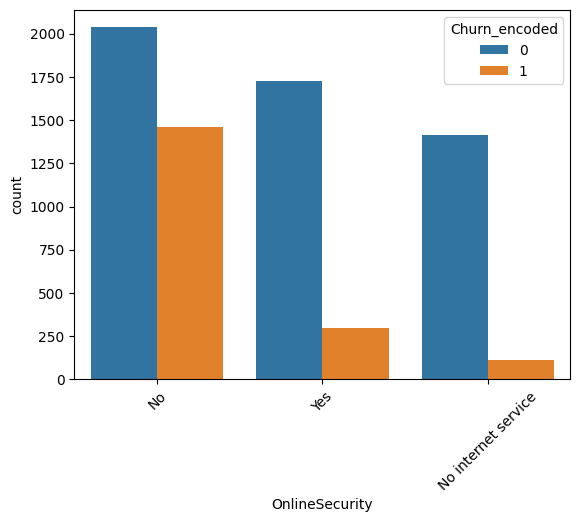

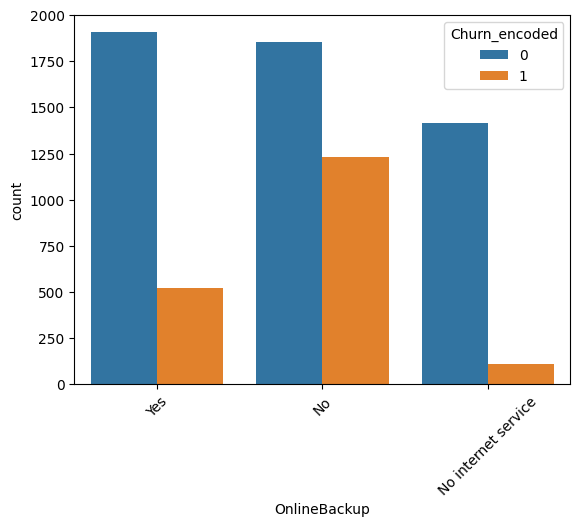

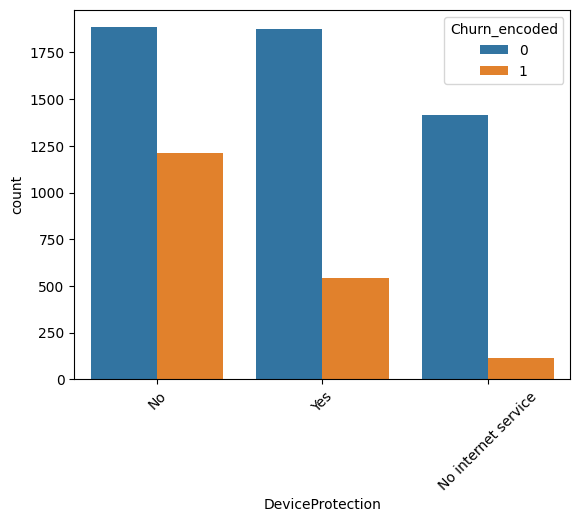

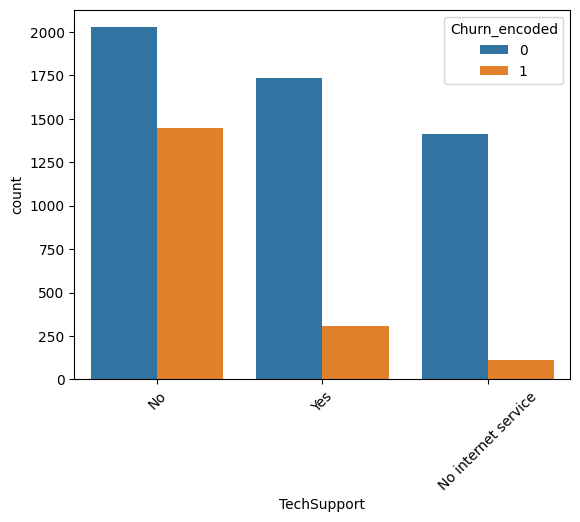

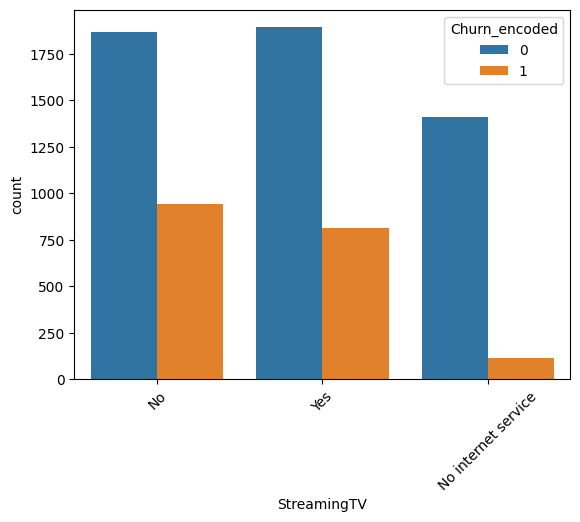

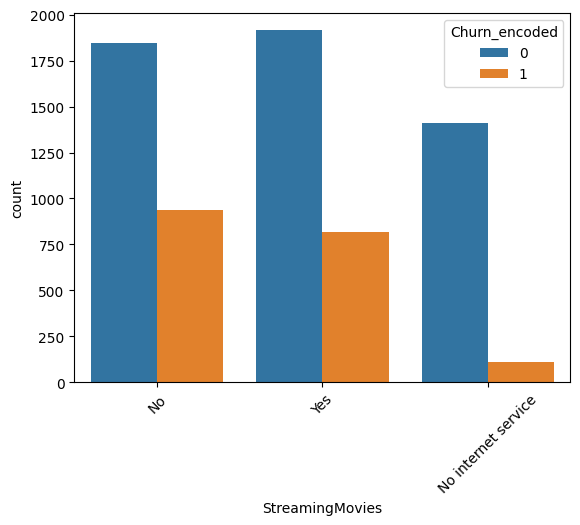

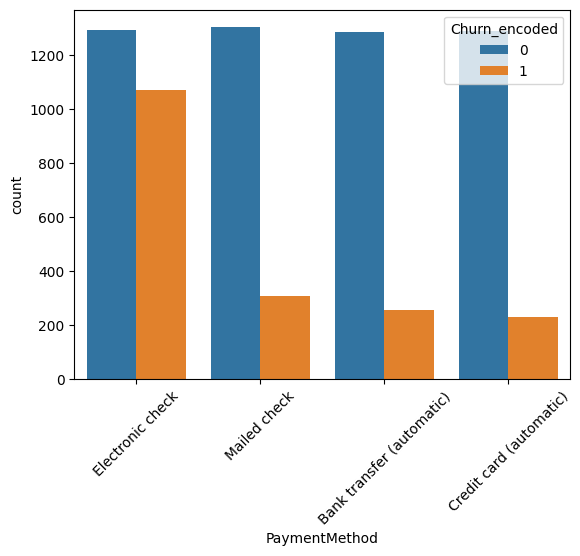

In [84]:
columns_to_check = [
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaymentMethod"
]

for column in columns_to_check:
    create_sns_countplot(column)

No clear order can be observed (especially considering the Yes/No values), but a few notable points can still be highlighted: Customers who pay electronically leave the company in much greater numbers compared to those using other payment methods. Additionally, it can be generally stated that customers without an internet subscription leave the company in much smaller numbers

In [85]:
df.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,customerID_number,customerID_text_char_1,customerID_text_char_2,customerID_text_char_3,customerID_text_char_4,customerID_text_char_5,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,Contract_encoded
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Electronic check,29.85,29.85,7590,V,H,V,E,G,0,1,0,0,1,0,1
1,0,34,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,1889.50,5575,G,N,V,D,E,1,0,0,1,0,0,2
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,108.15,3668,Q,P,Y,B,K,1,0,0,1,1,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,1840.75,7795,C,F,O,C,W,1,0,0,0,0,0,2
4,0,2,No,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,151.65,9237,H,Q,I,T,U,0,0,0,1,1,1,1


I apply one-hot encoding to the previously analyzed columns and also to the df['customerID_text_char_1-5'] column, as there is no observable order among them, and the values are qualitative. The customerID_text_char_1-5 values might contain hidden information about how the company categorized customers when assigning IDs, rather than being completely random. This is a typical piece of domain information I would inquire about as an ML engineer, as discovering that the IDs were assigned randomly could potentially allow for many columns to be dropped

In [86]:
from sklearn.preprocessing import OneHotEncoder
import os
import pickle

columns_to_encode = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaymentMethod', 'customerID_text_char_1', 'customerID_text_char_2',
    'customerID_text_char_3', 'customerID_text_char_4', 'customerID_text_char_5'
]

onehot_encoders = {}

def create_one_hot_coded_columns(dataframe, column_name):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataframe[[column_name]])
    encoded_column_names = encoder.get_feature_names_out([column_name])
    encoded_dataframe = pd.DataFrame(encoded_data, columns=encoded_column_names, index=dataframe.index)

    dataframe = pd.concat([dataframe.drop(columns=[column_name]), encoded_dataframe], axis=1)

    onehot_encoders[column_name] = encoder

    return dataframe

for column in columns_to_encode:
    df = create_one_hot_coded_columns(df, column)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_number,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,Contract_encoded,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID_text_char_1_A,customerID_text_char_1_B,customerID_text_char_1_C,customerID_text_char_1_D,customerID_text_char_1_E,customerID_text_char_1_F,customerID_text_char_1_G,customerID_text_char_1_H,customerID_text_char_1_I,customerID_text_char_1_J,customerID_text_char_1_K,customerID_text_char_1_L,customerID_text_char_1_M,customerID_text_char_1_N,customerID_text_char_1_O,customerID_text_char_1_P,customerID_text_char_1_Q,customerID_text_char_1_R,customerID_text_char_1_S,customerID_text_char_1_T,customerID_text_char_1_U,customerID_text_char_1_V,customerID_text_char_1_W,customerID_text_char_1_X,customerID_text_char_1_Y,customerID_text_char_1_Z,customerID_text_char_2_A,customerID_text_char_2_B,customerID_text_char_2_C,customerID_text_char_2_D,customerID_text_char_2_E,customerID_text_char_2_F,customerID_text_char_2_G,customerID_text_char_2_H,customerID_text_char_2_I,customerID_text_char_2_J,customerID_text_char_2_K,customerID_text_char_2_L,customerID_text_char_2_M,customerID_text_char_2_N,customerID_text_char_2_O,customerID_text_char_2_P,customerID_text_char_2_Q,customerID_text_char_2_R,customerID_text_char_2_S,customerID_text_char_2_T,customerID_text_char_2_U,customerID_text_char_2_V,customerID_text_char_2_W,customerID_text_char_2_X,customerID_text_char_2_Y,customerID_text_char_2_Z,customerID_text_char_3_A,customerID_text_char_3_B,customerID_text_char_3_C,customerID_text_char_3_D,customerID_text_char_3_E,customerID_text_char_3_F,customerID_text_char_3_G,customerID_text_char_3_H,customerID_text_char_3_I,customerID_text_char_3_J,customerID_text_char_3_K,customerID_text_char_3_L,customerID_text_char_3_M,customerID_text_char_3_N,customerID_text_char_3_O,customerID_text_char_3_P,customerID_text_char_3_Q,customerID_text_char_3_R,customerID_text_char_3_S,customerID_text_char_3_T,customerID_text_char_3_U,customerID_text_char_3_V,customerID_text_char_3_W,customerID_text_char_3_X,customerID_text_char_3_Y,customerID_text_char_3_Z,customerID_text_char_4_A,customerID_text_char_4_B,customerID_text_char_4_C,customerID_text_char_4_D,customerID_text_char_4_E,customerID_text_char_4_F,customerID_text_char_4_G,customerID_text_char_4_H,customerID_text_char_4_I,customerID_text_char_4_J,customerID_text_char_4_K,customerID_text_char_4_L,customerID_text_char_4_M,customerID_text_char_4_N,customerID_text_char_4_O,customerID_text_char_4_P,customerID_text_char_4_Q,customerID_text_char_4_R,customerID_text_char_4_S,customerID_text_char_4_T,customerID_text_char_4_U,customerID_text_char_4_V,customerID_text_char_4_W,customerID_text_char_4_X,customerID_text_char_4_Y,customerID_text_char_4_Z,customerID_text_char_5_A,customerID_text_char_5_B,customerID_text_char_5_C,customerID_text_char_5_D,customerID_text_char_5_E,customerID_text_char_5_F,customerID_text_char_5_G,customerID_text_char_5_H,customerID_text_char_5_I,customerID_text_char_5_J,customerID_text_char_5_K,customerID_text_char_5_L,customerID_text_char_5_M,customerID_text_char_5_N,customerID_text_char_5_O,customerID_text_char_5_P,customerID_text_char_5_Q,customerID_text_char_5_R,customerID_text_char_5_S,customerID_text_char_5_T,customerID_text_cha

Now we can check if there are any remaining columns that are not qualitative

In [87]:
print(df.dtypes.value_counts())

float64    160
int64        9
object       1
Name: count, dtype: int64


In [88]:
object_columns = df.select_dtypes(include='object').columns
print(f'object type columns: {list(object_columns)}')


object type columns: ['customerID_number']


Now these columns can easily be transformed

In [89]:
columns_to_convert = ['TotalCharges', 'customerID_number']
df[columns_to_convert] = df[columns_to_convert].astype(float)

print(df.dtypes.value_counts())

float64    161
int64        9
Name: count, dtype: int64


Now let's examine the distribution of the columns that we haven't transformed yet

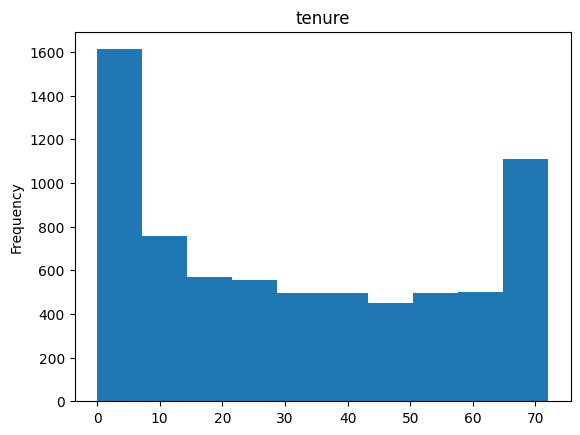

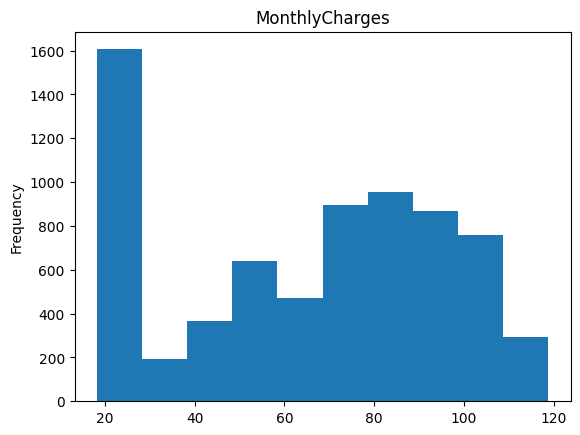

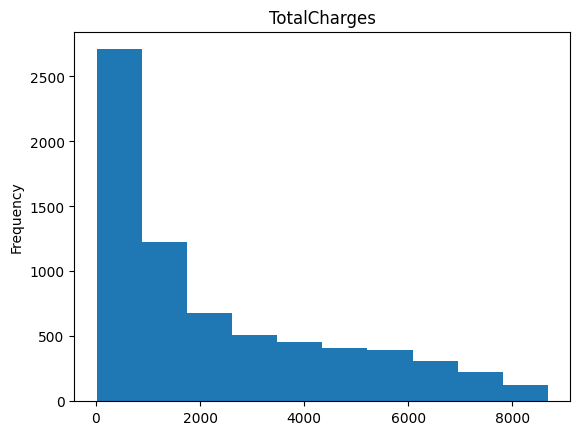

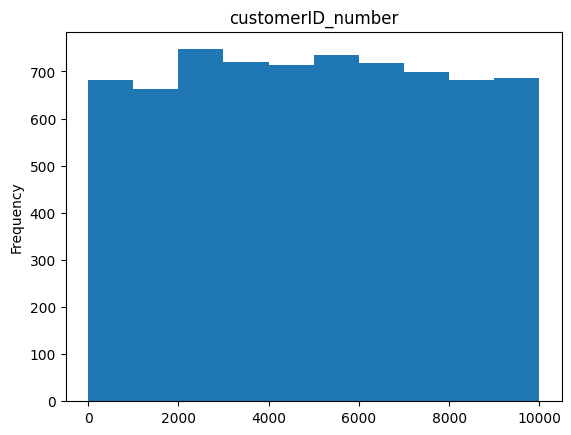

In [90]:
columns_to_investigate = ['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID_number']

def create_hist(column_name):
    plt.figure()
    df[column_name].plot(kind='hist', title=column_name, bins=10)

for col in columns_to_investigate:
    create_hist(col)

The MonthlyCharges column shows some resemblance to a normal distribution

In [91]:
print(df['MonthlyCharges'].skew())

-0.22052443394398033


In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

bell_type_columns = ['MonthlyCharges']
not_bell_type_columns = ['tenure', 'TotalCharges', 'customerID_number', 'Contract_encoded'] # Here, 'Contract_encoded' column is the ordinal encoded one

# We can save the scalers for further usage
standard_scaler_list = []
minmax_scaler_list = []

def apply_standard_scaling(dataframe, column_name):
    standard_scaler = StandardScaler()
    # The double [] sign needs, because the .fit_transform() method accepts only dataframe and with just one bracket it would mean an array or Series
    standard_scaler_list.append(standard_scaler)
    return standard_scaler.fit_transform(dataframe[[column_name]])

# I used normalisation for the ordinal columns also, because the relative order will stay the same, but the range of the values will decrease, so it will fit better for the model
def apply_normalisation(dataframe, column_name):
    min_max_scaler = MinMaxScaler(feature_range=(0.01,1)) # Feature range is because of MAPE
    minmax_scaler_list.append(min_max_scaler)
    return min_max_scaler.fit_transform(dataframe[[column_name]])

for column in bell_type_columns:
    df[column] = apply_standard_scaling(df, column)

for column in not_bell_type_columns:
    df[column] = apply_normalisation(df, column)

In [93]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_number,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,Contract_encoded,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID_text_char_1_A,customerID_text_char_1_B,customerID_text_char_1_C,customerID_text_char_1_D,customerID_text_char_1_E,customerID_text_char_1_F,customerID_text_char_1_G,customerID_text_char_1_H,customerID_text_char_1_I,customerID_text_char_1_J,customerID_text_char_1_K,customerID_text_char_1_L,customerID_text_char_1_M,customerID_text_char_1_N,customerID_text_char_1_O,customerID_text_char_1_P,customerID_text_char_1_Q,customerID_text_char_1_R,customerID_text_char_1_S,customerID_text_char_1_T,customerID_text_char_1_U,customerID_text_char_1_V,customerID_text_char_1_W,customerID_text_char_1_X,customerID_text_char_1_Y,customerID_text_char_1_Z,customerID_text_char_2_A,customerID_text_char_2_B,customerID_text_char_2_C,customerID_text_char_2_D,customerID_text_char_2_E,customerID_text_char_2_F,customerID_text_char_2_G,customerID_text_char_2_H,customerID_text_char_2_I,customerID_text_char_2_J,customerID_text_char_2_K,customerID_text_char_2_L,customerID_text_char_2_M,customerID_text_char_2_N,customerID_text_char_2_O,customerID_text_char_2_P,customerID_text_char_2_Q,customerID_text_char_2_R,customerID_text_char_2_S,customerID_text_char_2_T,customerID_text_char_2_U,customerID_text_char_2_V,customerID_text_char_2_W,customerID_text_char_2_X,customerID_text_char_2_Y,customerID_text_char_2_Z,customerID_text_char_3_A,customerID_text_char_3_B,customerID_text_char_3_C,customerID_text_char_3_D,customerID_text_char_3_E,customerID_text_char_3_F,customerID_text_char_3_G,customerID_text_char_3_H,customerID_text_char_3_I,customerID_text_char_3_J,customerID_text_char_3_K,customerID_text_char_3_L,customerID_text_char_3_M,customerID_text_char_3_N,customerID_text_char_3_O,customerID_text_char_3_P,customerID_text_char_3_Q,customerID_text_char_3_R,customerID_text_char_3_S,customerID_text_char_3_T,customerID_text_char_3_U,customerID_text_char_3_V,customerID_text_char_3_W,customerID_text_char_3_X,customerID_text_char_3_Y,customerID_text_char_3_Z,customerID_text_char_4_A,customerID_text_char_4_B,customerID_text_char_4_C,customerID_text_char_4_D,customerID_text_char_4_E,customerID_text_char_4_F,customerID_text_char_4_G,customerID_text_char_4_H,customerID_text_char_4_I,customerID_text_char_4_J,customerID_text_char_4_K,customerID_text_char_4_L,customerID_text_char_4_M,customerID_text_char_4_N,customerID_text_char_4_O,customerID_text_char_4_P,customerID_text_char_4_Q,customerID_text_char_4_R,customerID_text_char_4_S,customerID_text_char_4_T,customerID_text_char_4_U,customerID_text_char_4_V,customerID_text_char_4_W,customerID_text_char_4_X,customerID_text_char_4_Y,customerID_text_char_4_Z,customerID_text_char_5_A,customerID_text_char_5_B,customerID_text_char_5_C,customerID_text_char_5_D,customerID_text_char_5_E,customerID_text_char_5_F,customerID_text_char_5_G,customerID_text_char_5_H,customerID_text_char_5_I,customerID_text_char_5_J,customerID_text_char_5_K,customerID_text_char_5_L,customerID_text_char_5_M,customerID_text_char_5_N,customerID_text_char_5_O,customerID_text_char_5_P,customerID_text_char_5_Q,customerID_text_char_5_R,customerID_text_char_5_S,customerID_text_char_5_T,customerID_text_cha

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 170 entries, SeniorCitizen to customerID_text_char_5_Z
dtypes: float64(163), int64(7)
memory usage: 9.1 MB


Now we can create the folders into which we would like to save the encoders and scalers

In [95]:
from pathlib import Path

# parents=True: Creates parent directories if they do not exist
# exist_ok=True: Does nothing if the directory already exists (no error)
def create_folder(folder_path):
    Path(folder_path).mkdir(parents=True, exist_ok=True)

path_of_encoders = 'artifacts/encoders'
path_of_scalers = 'artifacts/scalers'
path_of_preprocessed_data = 'artifacts/preprocessed_data'

create_folder(path_of_encoders)
create_folder(path_of_scalers)
create_folder(path_of_preprocessed_data)

Now that we have our destination folders we can save the corresponding files

In [96]:
# Because pickle is an inbuilt package of python since beginning
import pickle

with open('artifacts/encoders/onehot_encoders.pkl', 'wb') as file_destination:
    pickle.dump(onehot_encoders, file_destination)

with open('artifacts/scalers/standard_scalers.pkl', 'wb') as file_destination:
    pickle.dump(standard_scaler_list, file_destination)

with open('artifacts/scalers/normalisation_scalers.pkl', 'wb') as file_destination:
    pickle.dump(minmax_scaler_list, file_destination)

# The parameter index=False is for not to save the generated indexes
df.to_csv('artifacts/preprocessed_data/cleaned_telco_dataset.csv', index=False)

## Creating models and validation

I aimed to apply as many models as possible and leverage the benefits of K-Fold cross-validation and GridSearch to create a concise yet broad-spectrum code

In [97]:
# %%capture I used this command to supress the conrete output of this cell
%%capture

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

def calc_grid_search_result(model, parameter_grid, cv_param):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=parameter_grid,
        cv=cv_param,
        scoring='roc_auc',
        verbose=1,
        n_jobs=-1,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_model, best_params, best_score

results = []

models_and_param_grids = [
    (LogisticRegression(), {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga']
    }),
    (DecisionTreeClassifier(random_state=42), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    (RandomForestClassifier(class_weight='balanced', random_state=42), {
        'n_estimators': [10, 50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    (GradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'max_depth': [3, 5, 10]
    }),
    (AdaBoostClassifier(random_state=42), {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }),
    (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }),
    (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }),
    (HistGradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'max_iter': [10, 50, 100],
        'max_depth': [None, 10]
    }),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'max_depth': [3, 5, 10]
    }),
    (LGBMClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'num_leaves': [15, 31, 50]
    })
]

for model, param_grid in models_and_param_grids:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    best_model, best_params, best_score = calc_grid_search_result(model, param_grid, cv)
    
    y_test_pred = best_model.predict(X_test)

    acc_score = accuracy_score(y_test, y_test_pred)
    prec_score = precision_score(y_test, y_test_pred)
    rec_score = recall_score(y_test, y_test_pred)
    f_score = f1_score(y_test, y_test_pred)

    results.append({
        'model': model.__class__.__name__,
        'best_params': best_params,
        'roc_auc_score': best_score,
        'accuracy': acc_score,
        'precision': prec_score,
        'recall': rec_score,
        'f1_score': f_score
    })

In [106]:
pd.set_option('display.max_colwidth', None)
results_df = pd.DataFrame(results).sort_values('roc_auc_score', ascending=False)
results_df

,model,best_params,roc_auc_score,accuracy,precision,recall,f1_score
4,AdaBoostClassifier,"{'learning_rate': 0.1, 'n_estimators': 100}",0.840077,0.801290,0.689498,0.480892,0.566604
9,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.839802,0.810753,0.703463,0.517516,0.596330
3,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.838625,0.810323,0.696842,0.527070,0.600181
10,LGBMClassifier,"{'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 15}",0.838255,0.787527,0.819048,0.273885,0.410501
0,LogisticRegression,"{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}",0.836667,0.816774,0.694981,0.573248,0.628272
8,HistGradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': None, 'max_iter': 100}",0.834903,0.796559,0.811245,0.321656,0.460661
2,RandomForestClassifier,"{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}",0.834268,0.785376,0.577805,0.762739,0.657515
5,SVC,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.826075,0.758710,0.838384,0.132166,0.228336
1,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}",0.825411,0.791398,0.609831,0.632166,0.620797
6,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}",0.777703,0.782796,0.639456,0.449045,0.527596


RandomForestClassifier, LogisticRegression, and AdaBoostClassifier seem to deliver the overall best results. Since my data is inherently imbalanced, I will try running the same process, but this time with Random Oversampling applied

In [115]:
%%capture

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

def calc_grid_search_result(model, parameter_grid, cv_param):

    pipeline = Pipeline(steps=[
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', model)
    ])

    # HERE is the big change compared to the previous code
    param_grid = {
        'classifier__' + key: value for key, value in parameter_grid.items()
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv_param,
        scoring='roc_auc',
        verbose=1,
        n_jobs=-1,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_model, best_params, best_score

results_oversampled = []

models_and_param_grids = [
    (LogisticRegression(), {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'saga']
    }),
    (DecisionTreeClassifier(random_state=42), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    }),
    (RandomForestClassifier(class_weight='balanced', random_state=42), {
        'n_estimators': [10, 50, 100],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    (GradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'max_depth': [3, 5, 10]
    }),
    (AdaBoostClassifier(random_state=42), {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    }),
    (SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }),
    (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }),
    (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }),
    (HistGradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'max_iter': [10, 50, 100],
        'max_depth': [None, 10]
    }),
    (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'max_depth': [3, 5, 10]
    }),
    (LGBMClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1],
        'n_estimators': [10, 50, 100],
        'num_leaves': [15, 31, 50]
    })
]

for model, param_grid in models_and_param_grids:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    best_model, best_params, best_score = calc_grid_search_result(model, param_grid, cv)
    
    y_test_pred = best_model.predict(X_test)

    acc_score = accuracy_score(y_test, y_test_pred)
    prec_score = precision_score(y_test, y_test_pred)
    rec_score = recall_score(y_test, y_test_pred)
    f_score = f1_score(y_test, y_test_pred)

    results_oversampled.append({
        'model': model.__class__.__name__,
        'best_params': best_params,
        'roc_auc_score': best_score,
        'accuracy': acc_score,
        'precision': prec_score,
        'recall': rec_score,
        'f1_score': f_score
    })

In [116]:
results_oversampled_df = pd.DataFrame(results_oversampled).sort_values('roc_auc_score', ascending=False)
results_oversampled_df

,model,best_params,roc_auc_score,accuracy,precision,recall,f1_score
3,GradientBoostingClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}",0.839714,0.749677,0.522908,0.835987,0.643382
9,XGBClassifier,"{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}",0.839600,0.747527,0.520118,0.843949,0.643594
4,AdaBoostClassifier,"{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}",0.838974,0.748817,0.521611,0.845541,0.645200
10,LGBMClassifier,"{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50, 'classifier__num_leaves': 15}",0.836823,0.761290,0.538789,0.807325,0.646272
2,RandomForestClassifier,"{'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}",0.834630,0.776344,0.561927,0.780255,0.653333
0,LogisticRegression,"{'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}",0.833280,0.750538,0.524194,0.828025,0.641975
8,HistGradientBoostingClassifier,"{'classifier__learning_rate': 0.01, 'classifier__max_depth': None, 'classifier__max_iter': 100}",0.833246,0.755699,0.530738,0.824841,0.645885
5,SVC,"{'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}",0.829084,0.735914,0.506823,0.828025,0.628779
1,DecisionTreeClassifier,"{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}",0.817576,0.735054,0.506186,0.781847,0.614518
7,GaussianNB,{'classifier__var_smoothing': 1e-09},0.764289,0.663226,0.434709,0.821656,0.568595


AdaBoostClassifier showed a significant improvement in recall, while LogisticRegression and RandomForestClassifier only exhibited minor changes. Moving forward, I plan to use Optuna to find better parameters for Logistic Regression, Random Forest, and AdaBoost, as my computer struggled with the computations 😊

In [ ]:
%%capture

import optuna as opt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
import pandas as pd

X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results_optimized = []

def logistic_regression_objective(trial):
    param = {
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None]),
        'C': trial.suggest_float('C', 0.01, 10, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 50, 500),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'random_state': 42
    }

    # just elasticnet needs for l1_ratio
    if param['penalty'] == 'elasticnet':
        if param['solver'] != 'saga':  # elasticnet works only with saga solver
            return float('inf')
        param['l1_ratio'] = trial.suggest_float('l1_ratio', 0.0, 1.0)

    # Check if the penalty and solver are compatibile or not 
    if param['penalty'] == 'l1' and param['solver'] != 'liblinear':
        return float('inf')
    if param['penalty'] is None and param['solver'] in ['liblinear', 'saga']:
        return float('inf')

    model = LogisticRegression(**param)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    return -scores.mean()

# RandomForest
def random_forest_objective(trial):
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200, 300]),
        'max_depth': trial.suggest_categorical('max_depth', [5, 10, 20, None]),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [1, 2, 4]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None]),
        'random_state': 42
    }

    model = RandomForestClassifier(**param)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    return -scores.mean()

# AdaBoost
def adaboost_objective(trial):
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200, 300]),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'random_state': 42
    }

    model = AdaBoostClassifier(**param)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')
    return -scores.mean()

lr_study = opt.create_study(direction='minimize')
lr_study.optimize(logistic_regression_objective, n_trials=50)

rf_study = opt.create_study(direction='minimize')
rf_study.optimize(random_forest_objective, n_trials=50)

ab_study = opt.create_study(direction='minimize')
ab_study.optimize(adaboost_objective, n_trials=50)

# Save results
results_optimized.append({
    'model': 'Logistic Regression',
    'best_params': lr_study.best_params,
    'roc_auc_score': -lr_study.best_value
})

results_optimized.append({
    'model': 'Random Forest',
    'best_params': rf_study.best_params,
    'roc_auc_score': -rf_study.best_value
})

results_optimized.append({
    'model': 'AdaBoost',
    'best_params': ab_study.best_params,
    'roc_auc_score': -ab_study.best_value
})

# Evaluate on Test dataset
for res in results_optimized:
    if res['model'] == 'Logistic Regression':
        best_model = LogisticRegression(**res['best_params'])
    elif res['model'] == 'Random Forest':
        best_model = RandomForestClassifier(**res['best_params'])
    elif res['model'] == 'AdaBoost':
        best_model = AdaBoostClassifier(**res['best_params'])

    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)

    res['accuracy'] = accuracy_score(y_test, y_test_pred)


[I 2024-12-30 00:01:10,586] A new study created in memory with name: no-name-a432cb93-779e-4382-92e9-a05b53214a41
[I 2024-12-30 00:01:10,589] Trial 0 finished with value: inf and parameters: {'penalty': None, 'C': 0.08849428197351708, 'solver': 'liblinear', 'max_iter': 146, 'fit_intercept': True}. Best is trial 0 with value: inf.
[I 2024-12-30 00:01:10,756] Trial 1 finished with value: -0.8309849162059256 and parameters: {'penalty': 'l2', 'C': 0.018442206441609016, 'solver': 'liblinear', 'max_iter': 423, 'fit_intercept': False}. Best is trial 1 with value: -0.8309849162059256.
[I 2024-12-30 00:01:11,900] Trial 2 finished with value: -0.8356983875399802 and parameters: {'penalty': 'elasticnet', 'C': 0.08882190875375406, 'solver': 'saga', 'max_iter': 489, 'fit_intercept': False, 'l1_ratio': 0.5623528862531456}. Best is trial 2 with value: -0.8356983875399802.
[I 2024-12-30 00:01:15,783] Trial 3 finished with value: -0.826825057923435 and parameters: {'penalty': 'elasticnet', 'C': 1.25994

In [122]:
results_optimized_df = pd.DataFrame(results_optimized)
results_optimized_df

,model,best_params,roc_auc_score,accuracy
0,Logistic Regression,"{'penalty': 'l1', 'C': 0.09967870056144569, 'solver': 'liblinear', 'max_iter': 143, 'fit_intercept': False}",0.836670,0.816774
1,Random Forest,"{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'class_weight': None}",0.836386,0.802581
2,AdaBoost,"{'n_estimators': 300, 'learning_rate': 0.05565331045176663}",0.840401,0.804731


With these parameters the scores are quite high so the time has come to check them on the test dataset

In [128]:
X = df.drop('Churn_encoded', axis=1)
y = df['Churn_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression
lr_best_params = {'penalty': 'l1', 'C': 0.09967870056144569, 'solver': 'liblinear', 'max_iter': 143, 'fit_intercept': False}
lr_model = LogisticRegression(**lr_best_params)
lr_model.fit(X_train, y_train)
lr_y_test_pred = lr_model.predict(X_test)

# Random Forest
rf_best_params = {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'class_weight': None}
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(X_train, y_train)
rf_y_test_pred = rf_model.predict(X_test)

# AdaBoost
ab_best_params = {'n_estimators': 300, 'learning_rate': 0.05565331045176663, 'algorithm': 'SAMME'}
ab_model = AdaBoostClassifier(**ab_best_params)
ab_model.fit(X_train, y_train)
ab_y_test_pred = ab_model.predict(X_test)

results_optimized_selected = []

models = [
    ('Logistic Regression', lr_y_test_pred),
    ('Random Forest', rf_y_test_pred),
    ('AdaBoost', ab_y_test_pred)
]

for model_name, y_pred in models:
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results_optimized_selected.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_optimized_selected_df = pd.DataFrame(results_optimized_selected)
results_optimized_selected_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.816774,0.694981,0.573248,0.628272
1,Random Forest,0.803871,0.708738,0.464968,0.561538
2,AdaBoost,0.788387,0.711180,0.364650,0.482105


## Conclusion:

The dataset is highly imbalanced, which affects recall across all models. Logistic Regression has the most balanced performance, so I would choose it as the final model. In a real-world scenario, I would address the imbalance by collecting more data, especially for the minority class. Since the dataset comes from a service provider, there are likely more records available, and adding them could greatly improve recall and reduce the impact of imbalance.